In [116]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Ellipse
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi

In [117]:
# Reading in the data
subset = ['control', 'test', 'test_N', 'difference', 'bca_low', 'bca_high']
all_dat = pd.read_csv('C:/Users/Emily/Documents/S1/S1_3.csv', usecols=subset)

DMSO_dat = all_dat.loc[all_dat['control'] == 'DMSO']
DMSO_dat = DMSO_dat.sort_values('difference').reset_index(drop=True)

comp_ord = DMSO_dat['test'].tolist()
comp_ord.insert(DMSO_dat['test'].tolist().index('H2O'), 'DMSO')

In [118]:
# The control group is missing from the list of test conditions. Need to add that back in
# so that the compounds are listed in the same order in both plots

def add_missing(data, ref):
    
    data = data.loc[data['control']== ref]
    data = data.sort_values('difference').reset_index(drop=True)

    #data = data.reset_index(drop=True)
    
    if ref == 'DMSO':
        not_missing = 'H2O'
        missing_index = data.index[data['test'] == not_missing].values[0]
    else:
        not_missing = 'DMSO'
        missing_index = ((data.index[data['test'] == not_missing].values[0]))
    print(missing_index)
    
        
    line = pd.DataFrame({"control": ref , "test": ref, 'test_N':"NaN", 
                         "difference":"NaN", "bca_low":"NaN", "bca_high":"NaN"}, index=[missing_index])
    
    all_data = pd.concat([data.iloc[:missing_index], line, data.iloc[missing_index:]]).reset_index(drop=True)
    return all_data


#### Generating plots comparing the 95% bootstrapped mean difference confidence intervals of the N2 response for each test condition against the null reference conditions DMSO:DMSO and DMSO:H2O

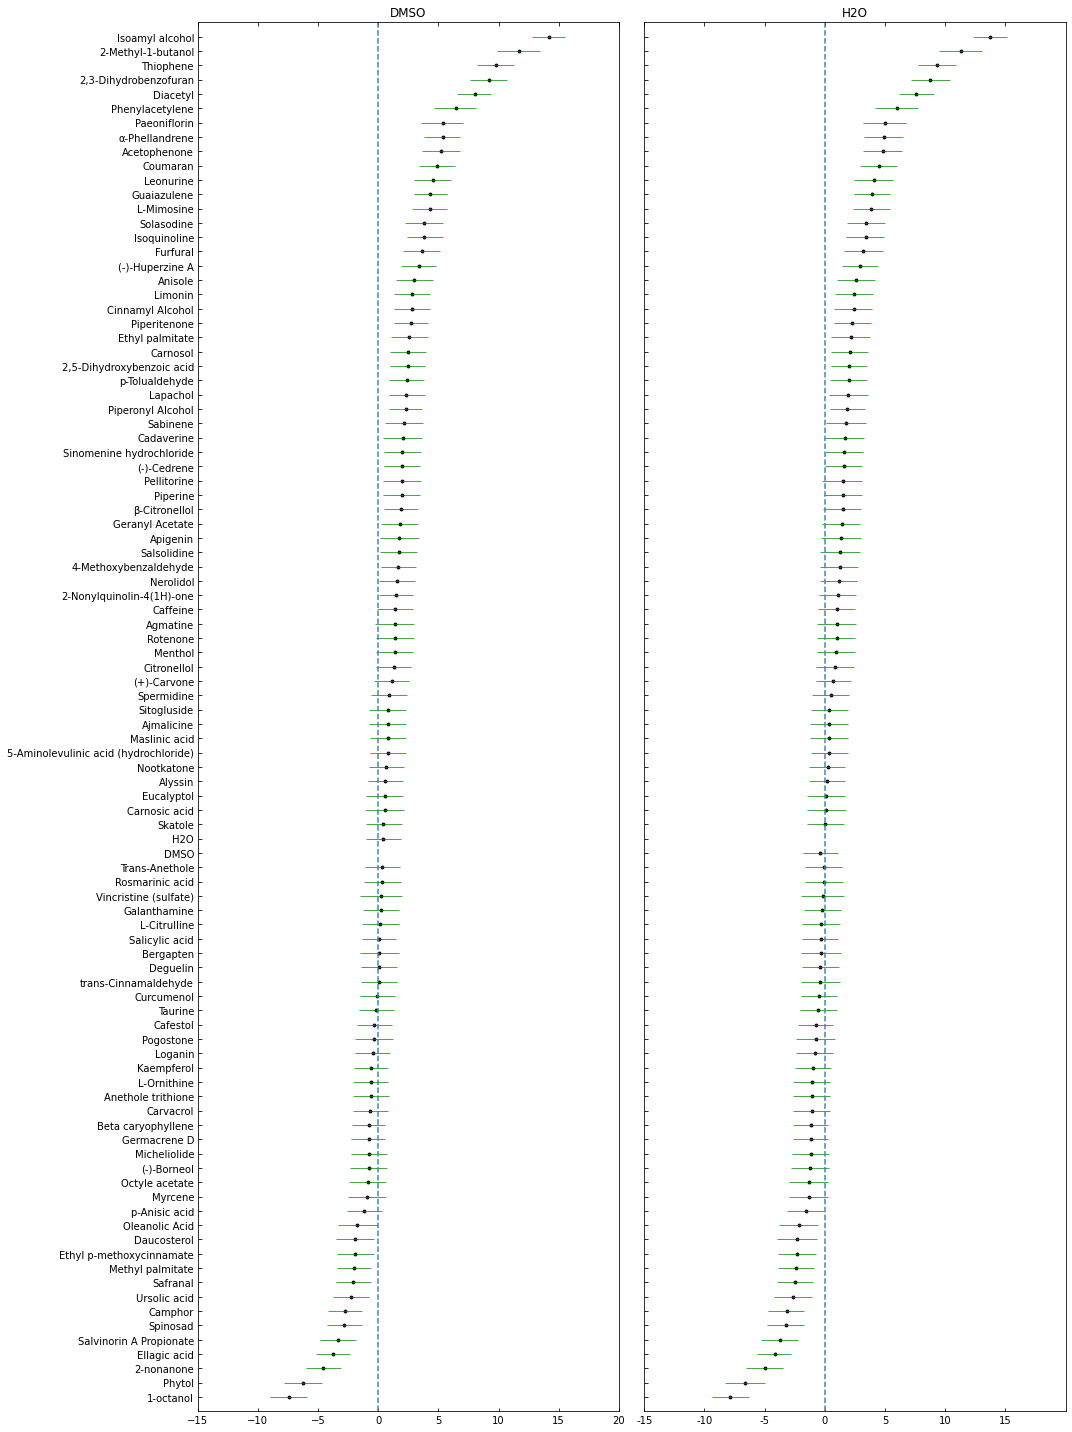

In [121]:

refs = ['DMSO', 'H2O']

fig, ax = plt.subplots(figsize=(15,20), ncols=(len(comps)), sharey=True) 

for j in refs:

    r = comps.index(j)
    #comp_ord = N2_dat.loc[N2_dat['control'] == 'DMSO']['test']
    positions = list(range(0, len(comp_ord)))


    ref_dat1 = all_dat.loc[all_dat['control']==j]
    ref_dat1 = ref_dat1.set_index('test')

    reordered1 = ref_dat1.reindex(comp_ord)
    reordered1 = reordered1.reset_index()

    lines1 = []

    for index, row in reordered1.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines1.append(line)


    ytick_labels = list(reordered1['test'])

    mdiffs1 = list(reordered1['difference'])

    hln_coll1 = mpl.collections.LineCollection(lines1, colors='green', linewidths = .7)

    #ax[r,c] = plt.gca()


    x_positions = list(np.arange(-15, 20, 5))

    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)


    ax[r].xaxis.set_ticks_position('both')
    ax[r].add_collection(hln_coll1)
    ax[r].scatter(mdiffs1, positions, s=8, c='black')
    ax[r].tick_params(axis='both', tickdir='in')

    ax[r].set_xlim(-15, (20))    
    ax[r].set_ylim(-1, len(comp_ord))
    ax[r].set_title(j)
    ax[r].axvline(0, ls='--', c='steelblue')
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/Images/Fig4.svg')

#### Below is a depcricated draft visualization for the same dataset


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


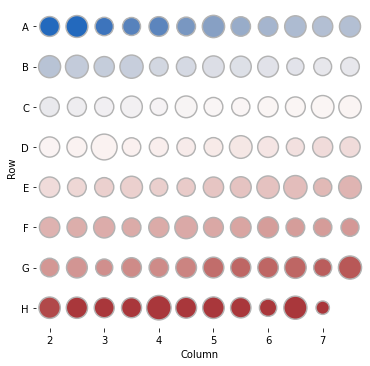

In [38]:

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=dat,
    x="Column", y="Row", hue='difference', size=(dat['bca_high']-dat['bca_low']),
    palette="vlag", hue_norm=(-5, 5), edgecolor=".7",
    height=5, sizes=(100, 800), size_norm=(2.5, 3.75),
)

#cax = g.fig.add_axes([.92, .12, .02, .8])


# Tweak the figure to finalize
g.set(xlim=(-.5,11.5), ylim=(7.5,-.5))
g.ax.set_xticklabels(xlabels)
g.ax.set_yticklabels(ylabels)
g.despine(left=True, bottom=True)
g.ax.margins(.02)
g.legend.set_visible(False)
g.savefig('D:/NP_manuscript/mean_diff.png', dpi = 300)

#g.colorbar()



In [9]:
# Generating a function to plot the data

def mdiff_plot(wt_df, control, wt, ordr, low_lim, up_lim):
    
    positions = list(range(0,96))
    ref_dat1 = wt_df.loc[wt_df['control']==control]
    ref_dat1 = ref_dat1.set_index('test')
    
    reordered1 = ref_dat1.reindex(ordr)
    reordered1 = reordered1.reset_index()
    
    lines1 = []
    for index, row in reordered1.iterrows():
        line = ((row['bca_low'], index), (row['bca_high'], index))
        lines1.append(line)
    
    ytick_labels = list(reordered1['test'])
    
    mdiffs1 = list(reordered1['difference'])
    
    fig, ax = plt.subplots(figsize=(5,15)) 

    hln_coll1 = mpl.collections.LineCollection(lines1, colors='grey')
    ax = plt.gca()
    
    x_positions = list(np.arange(low_lim, up_lim, 5))
    
    plt.yticks(positions, ytick_labels )
    plt.xticks(x_positions, x_positions)

    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_ticks_position('both')
    #minor_locator = AutoMinorLocator(5)
    #ax.xaxis.set_minor_locator(minor_locator)
    ax.add_collection(hln_coll1)

    ax.scatter(mdiffs1, positions, s=10, c='black')
    ax.tick_params(axis='both', tickdir='in')
    plt.axvline(0, ls='--', c='steelblue')
    ax.set_xlim(low_lim, (up_lim-5))
    #ax.yaxis.set_ticklabels([])
    ax.set_ylim(-1, 96)
    plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    #plt.savefig('D:/NP_manuscript/figs/'+ wt + '_' + control + '_mdiffPlot.svg')